### Objective:
* Examine/clean the dataset
* Explore distributions of single numerical and categorical features via statistics and plots
* Explore relationships of multiple features via statistics and plots

In [135]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#Read dataset
df=pd.read_csv("athlete_events.csv")
df.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [137]:
#shape
df.shape

(271116, 15)

In [138]:
# Null or missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [139]:
#Check type of dataset
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [140]:
#Same function to check null values
df.isna().sum()


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [141]:
df.describe() #to check numerical values

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Weight'}>],
       [<AxesSubplot:title={'center':'Year'}>, <AxesSubplot:>]],
      dtype=object)

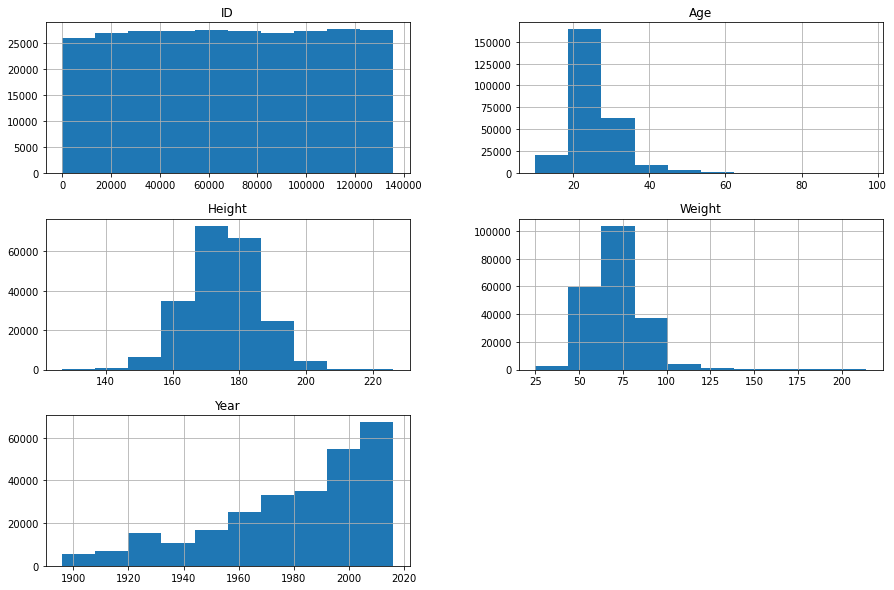

In [142]:
df.hist(figsize=(15, 10))


In [143]:
import pandas_profiling
from pandas_profiling import ProfileReport
report=df.profile_report()
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [144]:
#Find unique values from all the columns
def func(values):
    return df[values].unique()
for i in df.columns:
    print (i, func(i))

ID [     1      2      3 ... 135569 135570 135571]
Name ['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'Andrzej ya' 'Piotr ya'
 'Tomasz Ireneusz ya']
Sex ['M' 'F']
Age [24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. nan 19. 38. 35. 16. 37. 15. 42. 46. 40. 36.
 14. 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 75. 65. 56. 64. 68.
 84. 12. 72. 59. 61. 70. 74. 62. 67. 69. 73. 66. 11. 76. 88. 96. 80. 10.
 81. 77. 97.]
Height [180. 170.  nan 185. 188. 183. 168. 186. 182. 172. 159. 171. 184. 175.
 189. 176. 163. 187. 169. 174. 190. 194. 177. 167. 164. 198. 165. 156.
 179. 178. 166. 181. 155. 160. 173. 192. 195. 191. 203. 158. 154. 153.
 152. 193. 162. 197. 157. 207. 147. 150. 202. 161. 210. 205. 200. 148.
 208. 140. 213. 204. 151. 196. 146. 201. 132. 149. 199. 211. 215. 139.
 206. 135. 142. 217. 209. 145. 221. 144. 214. 143. 218. 127. 223. 216.
 141. 212. 131. 136. 137. 138. 220. 130. 219. 133. 128. 226.]
Weight [ 80.          60.   

In [145]:
#find unique values 
print (df.apply(lambda x:x.unique()))

ID        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Name      [A Dijiang, A Lamusi, Gunnar Nielsen Aaby, Edg...
Sex                                                  [M, F]
Age       [24.0, 23.0, 34.0, 21.0, 25.0, 27.0, 31.0, 33....
Height    [180.0, 170.0, nan, 185.0, 188.0, 183.0, 168.0...
Weight    [80.0, 60.0, nan, 82.0, 75.0, 72.0, 96.0, 76.5...
Team      [China, Denmark, Denmark/Sweden, Netherlands, ...
NOC       [CHN, DEN, NED, USA, FIN, NOR, ROU, EST, FRA, ...
Games     [1992 Summer, 2012 Summer, 1920 Summer, 1900 S...
Year      [1992, 2012, 1920, 1900, 1988, 1994, 1932, 200...
Season                                     [Summer, Winter]
City      [Barcelona, London, Antwerpen, Paris, Calgary,...
Sport     [Basketball, Judo, Football, Tug-Of-War, Speed...
Event     [Basketball Men's Basketball, Judo Men's Extra...
Medal                           [nan, Gold, Bronze, Silver]
dtype: object


In [146]:
df.describe() #TO get overview of numerical values

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


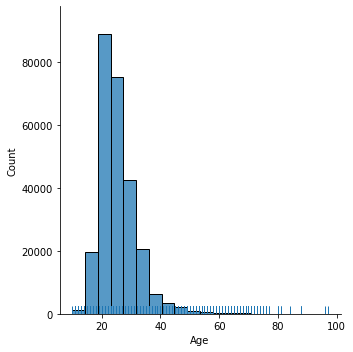

In [147]:
# Plot the histogram with a rug plot of the column Age using Seaborn, with both 20 and 50 bins
sns.displot(x="Age", bins=20, data=df, rug=True)

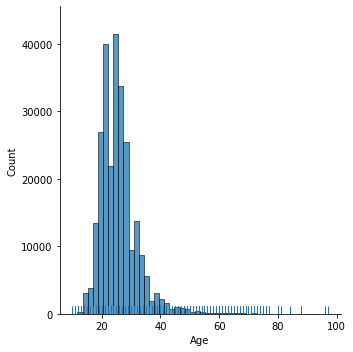

In [148]:
sns.displot(x="Age", bins=50, data=df, rug=True)

In [149]:
# To drop null values
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [150]:
#Dropping Medal column as most of the values are NAN and NOC column as it is not useful

df.drop(df.columns[[7,-1]], axis=1, inplace=True)
df.head(2)


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight


In [151]:
df.iloc[:,[7] ]

,Games
0,1992 Summer
1,2012 Summer
2,1920 Summer
3,1900 Summer
4,1988 Winter
...,...
271111,1976 Winter
271112,2014 Winter
271113,2014 Winter
271114,1998 Winter


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Year    271116 non-null  int64  
 9   Season  271116 non-null  object 
 10  City    271116 non-null  object 
 11  Sport   271116 non-null  object 
 12  Event   271116 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 26.9+ MB


In [153]:
#Drop the duplicate values
df.drop_duplicates(inplace=True)
df.shape


(269661, 13)

In [154]:
#Cleaning columns, First column having null values is Age with mean values
df["Age"].fillna(df["Age"].mean(),inplace=True)
df["Age"].isnull().sum()


0

In [155]:
#Second column, replacing null values with backfill
df["Height"].isnull().sum()
df["Height"].fillna(df["Height"].bfill(),inplace=True)
df["Height"].isnull().sum()

0

In [156]:
#Dropping null values

df["Weight"].fillna(df["Weight"].mean(),inplace=True)
df.info()
#If less null values then use df.dropna(inplace=True) as we had many null values so we filled it with bfill or ffill or mean

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269661 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269661 non-null  int64  
 1   Name    269661 non-null  object 
 2   Sex     269661 non-null  object 
 3   Age     269661 non-null  float64
 4   Height  269661 non-null  float64
 5   Weight  269661 non-null  float64
 6   Team    269661 non-null  object 
 7   Games   269661 non-null  object 
 8   Year    269661 non-null  int64  
 9   Season  269661 non-null  object 
 10  City    269661 non-null  object 
 11  Sport   269661 non-null  object 
 12  Event   269661 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 28.8+ MB


In [157]:
#Now deal with columns which have too many unique values
df.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight


In [158]:
df["Age"].unique()

array([24.        , 23.        , 34.        , 21.        , 25.        ,
       27.        , 31.        , 33.        , 18.        , 26.        ,
       22.        , 30.        , 32.        , 28.        , 54.        ,
       20.        , 17.        , 43.        , 47.        , 29.        ,
       41.        , 45.        , 49.        , 53.        , 57.        ,
       25.45288729, 19.        , 38.        , 35.        , 16.        ,
       37.        , 15.        , 42.        , 46.        , 40.        ,
       36.        , 14.        , 39.        , 48.        , 52.        ,
       44.        , 55.        , 50.        , 71.        , 63.        ,
       51.        , 58.        , 13.        , 60.        , 75.        ,
       65.        , 56.        , 64.        , 68.        , 84.        ,
       12.        , 72.        , 59.        , 61.        , 70.        ,
       74.        , 62.        , 67.        , 69.        , 73.        ,
       66.        , 11.        , 76.        , 88.        , 96.  

In [159]:
#To replace commas from Age column if commas are there in the middle of number
# def data(value):
#     value=str(value)
#     if "," in value:
#         value=value.replace (",", " ")
#         return float(value)
#     else: 
#         return float (value)
# df["Age"]= df["Age"].apply (data)
# df["Age"].unique()

In [160]:
df.value_counts()

ID      Name                    Sex  Age   Height  Weight    Team     Games        Year  Season  City            Sport       Event                                
1       A Dijiang               M    24.0  180.0   80.00000  China    1992 Summer  1992  Summer  Barcelona       Basketball  Basketball Men's Basketball              1
90882   Endre Palcz             M    41.0  179.0   70.70181  Hungary  1952 Summer  1952  Summer  Helsinki        Fencing     Fencing Men's Foil, Individual           1
90883   Matti Ilmari Paloheimo  M    40.0  179.0   85.00000  Finland  1976 Summer  1976  Summer  Montreal        Sailing     Sailing Mixed Three Person Keelboat      1
90884   Paavo Lauri Palokangas  M    36.0  175.0   74.00000  Finland  1980 Summer  1980  Summer  Moskva          Shooting    Shooting Mixed Free Pistol, 50 metres    1
                                     40.0  175.0   74.00000  Finland  1984 Summer  1984  Summer  Los Angeles     Shooting    Shooting Men's Free Pistol, 50 metres   